<a href="https://colab.research.google.com/github/KrishVM-4687/Python-DAV-Projects/blob/main/Movie_Box_Office_and_Viewer_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Requirements

1. Data Overview:

    a. Combine datasets


2. Data Analysis:

    a. calculate profit from revenue and budget
    
    b. create budget_tier categories.

3. Data Visualization:
    
    a. budget vs. worldwide_gross
    
    b. average IMDb_rating by genre
    
    c. heat map showing correlation between budget, revenue, and ratings.

# Load Data into Pandas Dataframe

In [2]:
#Load Datasets
!gdown 1Esuqyrr673MiPAzG9Adz59BauLw0LlHw
!gdown 1hh5lcWQVtXQjmcuILJALBvKyssvr3Hme
!gdown 1UycBhdIbd54Qzrd5NYjPzOGIN32IMryp


Downloading...
From: https://drive.google.com/uc?id=1Esuqyrr673MiPAzG9Adz59BauLw0LlHw
To: /content/movie_metadata.csv
100% 568/568 [00:00<00:00, 1.34MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hh5lcWQVtXQjmcuILJALBvKyssvr3Hme
To: /content/box_office_data.csv
100% 399/399 [00:00<00:00, 1.24MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UycBhdIbd54Qzrd5NYjPzOGIN32IMryp
To: /content/ratings_data.csv
100% 149/149 [00:00<00:00, 588kB/s]


In [3]:
movie_metadata = pd.read_csv('movie_metadata.csv')
box_office_data = pd.read_csv('box_office_data.csv')
ratings_data = pd.read_csv('ratings_data.csv')

In [4]:
movie_metadata.head()

,movie_id,title,director,genre,release_date
0,1,Shadow Night 1,John Smith,Adventure,2011-04-02
1,2,Lost Ocean 2,Sophia Lee,Drama,2017-07-13
2,3,City Dream 3,Jane Doe,Thriller,2012-10-17
3,4,Fire Thunder 4,Michael Bay,Fantasy,2013-09-30
4,5,Secret Star 5,Emily Clark,Comedy,2022-02-18


In [5]:
box_office_data.head()

,movie_id,budget,revenue,worldwide_gross
0,1,158572459.0,461503226.0,502511722.0
1,2,129395121.0,155218344.0,314021241.0
2,3,180899113.0,496550306.0,682688786.0
3,4,122355397.0,238543452.0,380964849.0
4,5,136742371.0,334957752.0,399101251.0


In [6]:
ratings_data.head()

,movie_id,IMDb_rating,Rotten_Tomatoes_score
0,1,7.1,84.0
1,2,6.4,68.0
2,3,6.8,73.0
3,4,7.7,90.0
4,5,5.9,56.0


# Data Overview

In [7]:
#Combine Datasetsf
df = pd.merge(movie_metadata, box_office_data, on='movie_id')
df = pd.merge(df, ratings_data, on='movie_id')
df.head()

,movie_id,title,director,genre,release_date,budget,revenue,worldwide_gross,IMDb_rating,Rotten_Tomatoes_score
0,1,Shadow Night 1,John Smith,Adventure,2011-04-02,158572459.0,461503226.0,502511722.0,7.1,84.0
1,2,Lost Ocean 2,Sophia Lee,Drama,2017-07-13,129395121.0,155218344.0,314021241.0,6.4,68.0
2,3,City Dream 3,Jane Doe,Thriller,2012-10-17,180899113.0,496550306.0,682688786.0,6.8,73.0
3,4,Fire Thunder 4,Michael Bay,Fantasy,2013-09-30,122355397.0,238543452.0,380964849.0,7.7,90.0
4,5,Secret Star 5,Emily Clark,Comedy,2022-02-18,136742371.0,334957752.0,399101251.0,5.9,56.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_id               12 non-null     object 
 1   title                  11 non-null     object 
 2   director               11 non-null     object 
 3   genre                  11 non-null     object 
 4   release_date           11 non-null     object 
 5   budget                 11 non-null     float64
 6   revenue                11 non-null     float64
 7   worldwide_gross        11 non-null     float64
 8   IMDb_rating            11 non-null     float64
 9   Rotten_Tomatoes_score  11 non-null     float64
dtypes: float64(5), object(5)
memory usage: 1.1+ KB


In [10]:
df.shape

(12, 10)

In [11]:
df.isnull()

,movie_id,title,director,genre,release_date,budget,revenue,worldwide_gross,IMDb_rating,Rotten_Tomatoes_score
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [13]:
# drop row with index 10
df.drop(10, inplace=True)

In [15]:
df.isnull()

,movie_id,title,director,genre,release_date,budget,revenue,worldwide_gross,IMDb_rating,Rotten_Tomatoes_score
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [16]:
#rename index no. 11 as 10
df.rename(index={11:10}, inplace=True)

In [17]:
df.isnull()

,movie_id,title,director,genre,release_date,budget,revenue,worldwide_gross,IMDb_rating,Rotten_Tomatoes_score
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


# Data Analysis

In [18]:
#Calculate profit from budget and world wide gross
df['profit'] = df['worldwide_gross'] - df['budget']
df.head()

,movie_id,title,director,genre,release_date,budget,revenue,worldwide_gross,IMDb_rating,Rotten_Tomatoes_score,profit
0,1,Shadow Night 1,John Smith,Adventure,2011-04-02,158572459.0,461503226.0,502511722.0,7.1,84.0,343939263.0
1,2,Lost Ocean 2,Sophia Lee,Drama,2017-07-13,129395121.0,155218344.0,314021241.0,6.4,68.0,184626120.0
2,3,City Dream 3,Jane Doe,Thriller,2012-10-17,180899113.0,496550306.0,682688786.0,6.8,73.0,501789673.0
3,4,Fire Thunder 4,Michael Bay,Fantasy,2013-09-30,122355397.0,238543452.0,380964849.0,7.7,90.0,258609452.0
4,5,Secret Star 5,Emily Clark,Comedy,2022-02-18,136742371.0,334957752.0,399101251.0,5.9,56.0,262358880.0


In [19]:
#create budget_tier categories.

df['budget_tier'] = pd.cut(
    df['budget'],
    bins=[0, 500000000, 1000000000, float('inf')],
    labels=['Low Tier', 'Mid Tier', 'Top Tier']
)

In [20]:
df.head()

,movie_id,title,director,genre,release_date,budget,revenue,worldwide_gross,IMDb_rating,Rotten_Tomatoes_score,profit,budget_tier
0,1,Shadow Night 1,John Smith,Adventure,2011-04-02,158572459.0,461503226.0,502511722.0,7.1,84.0,343939263.0,Low Tier
1,2,Lost Ocean 2,Sophia Lee,Drama,2017-07-13,129395121.0,155218344.0,314021241.0,6.4,68.0,184626120.0,Low Tier
2,3,City Dream 3,Jane Doe,Thriller,2012-10-17,180899113.0,496550306.0,682688786.0,6.8,73.0,501789673.0,Low Tier
3,4,Fire Thunder 4,Michael Bay,Fantasy,2013-09-30,122355397.0,238543452.0,380964849.0,7.7,90.0,258609452.0,Low Tier
4,5,Secret Star 5,Emily Clark,Comedy,2022-02-18,136742371.0,334957752.0,399101251.0,5.9,56.0,262358880.0,Low Tier


# Data Visualization

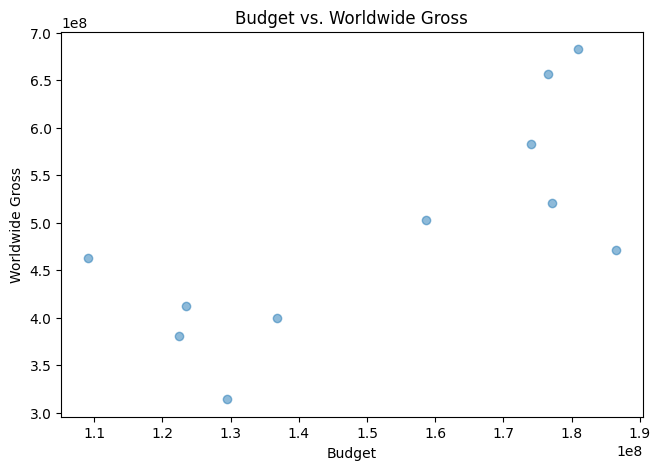

In [21]:
#budget vs. worldwide_gross
#We use Scatter plot as budget and worldwide gross both are continuous variables

plt.figure(figsize=(7.5, 5))
plt.scatter(df['budget'], df['worldwide_gross'], alpha=0.5)
plt.title('Budget vs. Worldwide Gross')
plt.xlabel('Budget')
plt.ylabel('Worldwide Gross')
plt.show()

In [22]:
df.columns

Index(['movie_id', 'title', 'director', 'genre', 'release_date', 'budget',
       'revenue', 'worldwide_gross', 'IMDb_rating', 'Rotten_Tomatoes_score',
       'profit', 'budget_tier'],
      dtype='object')